### Data and Packages

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import date
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [183]:
df = pd.read_csv("C:/Users/User/Downloads/games.csv")

In [184]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [186]:
df = df[df.created_at != df.last_move_at]

### Correcting datatypes

In [187]:
df['created_at'] = pd.to_datetime(df['created_at'], unit =  "ms")
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit =  "ms")

In [188]:
df.describe()

,turns,white_rating,black_rating,opening_ply
count,11510.000000,11510.000000,11510.000000,11510.000000
mean,61.912858,1615.728931,1608.222850,4.926412
std,34.295767,290.356860,287.732541,2.921046
min,1.000000,784.000000,789.000000,1.000000
25%,38.000000,1423.000000,1418.000000,3.000000
50%,57.000000,1589.000000,1584.000000,4.000000
75%,81.000000,1807.000000,1801.000000,6.000000
max,349.000000,2700.000000,2621.000000,28.000000


In [189]:
df.describe(include="O")

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
count,11510,11510,11510,11510,11510,11510,11510,11510,11510
unique,11056,4,3,342,5690,5688,10918,344,1264
top,mJ9VpdxV,resign,white,10+0,taranga,taranga,e4 e5,A00,Van't Kruijs Opening
freq,4,6450,5753,4405,57,67,21,593,243


In [190]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [191]:
df.duplicated().sum()

414

In [192]:
df = df.drop_duplicates()

In [193]:
df.duplicated().sum()

0

In [194]:
df.shape

(11096, 16)

array([[<AxesSubplot:title={'center':'white_rating'}>,
        <AxesSubplot:title={'center':'black_rating'}>]], dtype=object)

<Figure size 576x576 with 0 Axes>

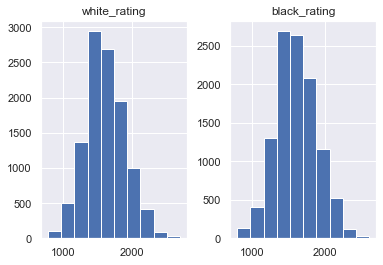

In [195]:
plt.figure(figsize = (8,8))
df.hist(column=["white_rating", "black_rating"])

Let's see if there are any linear dependencies between variables.

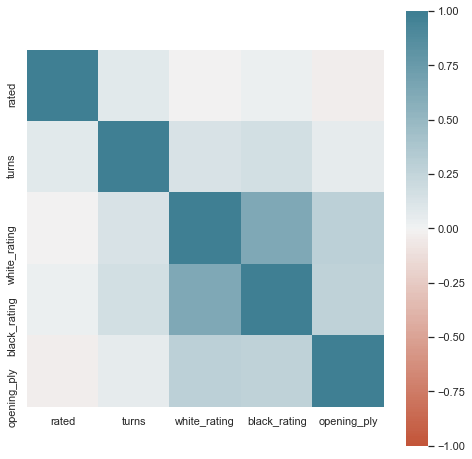

In [196]:
plt.figure(figsize = (8,8))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

<AxesSubplot:xlabel='black_rating', ylabel='white_rating'>

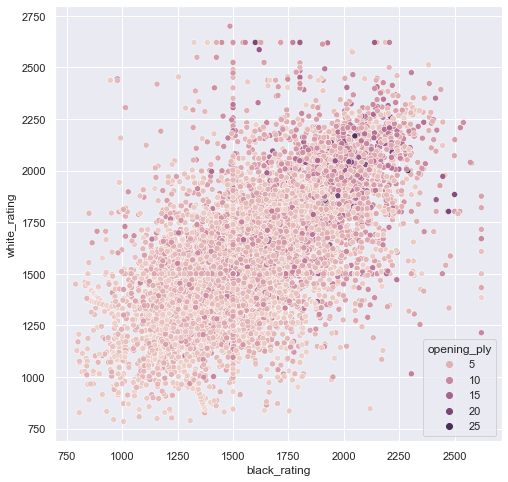

In [197]:
plt.figure(figsize = (8,8))
sns.scatterplot(data=df, x="black_rating", y="white_rating", hue="opening_ply")

### Hypothesis 1: The player with white pieces has an advantage as they are the one who starts the game.

<AxesSubplot:>

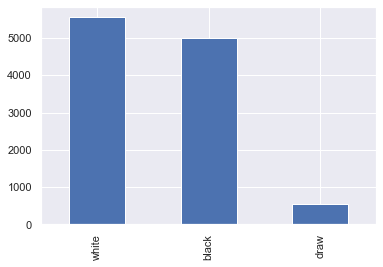

In [198]:
df['winner'].value_counts().plot(kind='bar')

<Figure size 1800x1800 with 0 Axes>

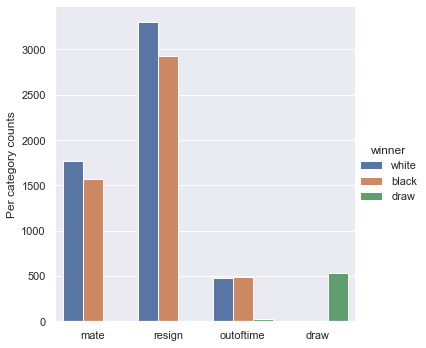

In [199]:
sns.set(font_scale = 1)
plt.figure(figsize=(25, 25))
g = sns.catplot(x="victory_status", hue="winner", data=df, kind="count")
(g.set_axis_labels("", "Per category counts"))

<AxesSubplot:xlabel='count', ylabel='rated'>

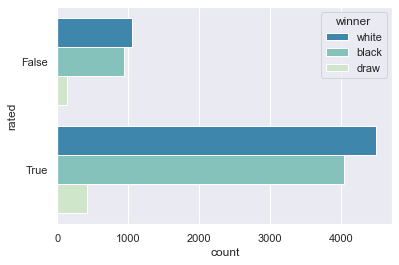

In [200]:
sns.countplot(y="rated", hue="winner", palette = "GnBu_r", data=df)

* For both cases(rated, unrated) picture is the same.

#### Summary

From all above charts it is clear that, whites, altough little, but have advantage over blacks.

### Hypothesis 2: Does the length of the game (# of moves affect the result?). There are 3 possible results in chess game: white wins, black wins, game ends in draw(no one wins).

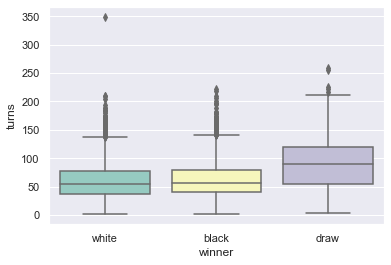

In [201]:
ax = sns.boxplot(x="winner", y="turns",  data=df, palette="Set3")

* There is no difference between blacks and whites.

It is interesting to find out efficiency of game by increasing number of turns. I decided to make numerical data categorical and show for each category how are distributed black and white winnings.

In [202]:
bins = [0, 2, 18, 35, 65, np.inf]
turns = ['2', '2-18', '18-35', '35-65', '65+']
df['turns'] = pd.cut(df['turns'], bins, labels=turns)

<Figure size 1800x1800 with 0 Axes>

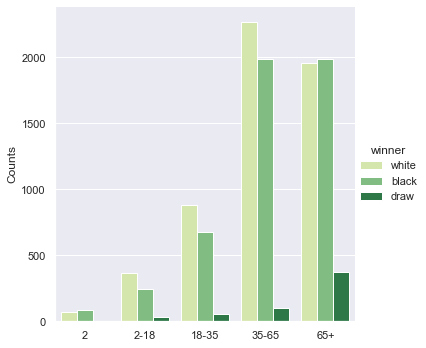

In [203]:
sns.set(font_scale = 1)
plt.figure(figsize=(25, 25))
g = sns.catplot(x="turns", hue="winner",data=df, kind="count", palette = "YlGn")
(g.set_axis_labels("", "Counts"))
for p in g.ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');

* Main turns are between '36-65' and '65+' ranges.
* As turns are increasing draws are increasing.
* There are winnings with only 2 steps, and in that case winners are mainly black ones. It is known as ["Fool's mate"](https://en.wikipedia.org/wiki/Fool%27s_mate). 

In [204]:
ct = pd.crosstab(df.turns,df.winner, margins=False)
ct

winner,black,draw,white
turns,,,
2,88,0,73
2-18,247,31,369
18-35,680,53,882
35-65,1989,98,2270
65+,1984,375,1957


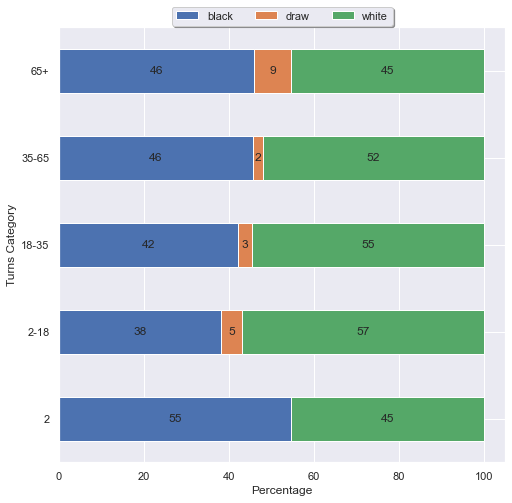

In [205]:
stacked_ct = ct.apply(lambda x: x*100/sum(x), axis=1)
ax = stacked_ct.plot(kind='barh', stacked=True, figsize=(8,8))
plt.xlabel("Percentage")
plt.ylabel("Turns Category")
plt.legend(loc='upper center', shadow=True, bbox_to_anchor=(0.15, 0.55, 0.7, 0.51),  ncol=5)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');

* As turns are increasing "white" winnings are decreasing, while "black"s are increasing. 
* After 65-th turn both are almost equal.

### Hypothesis 3: Which openings (the set of first several moves in chess are called openings. As some sequences of moves are very common, they got their names, for example: Queen's gambit, etc.) are the best? Maybe at different levels (rating levels) different openings are performing better?

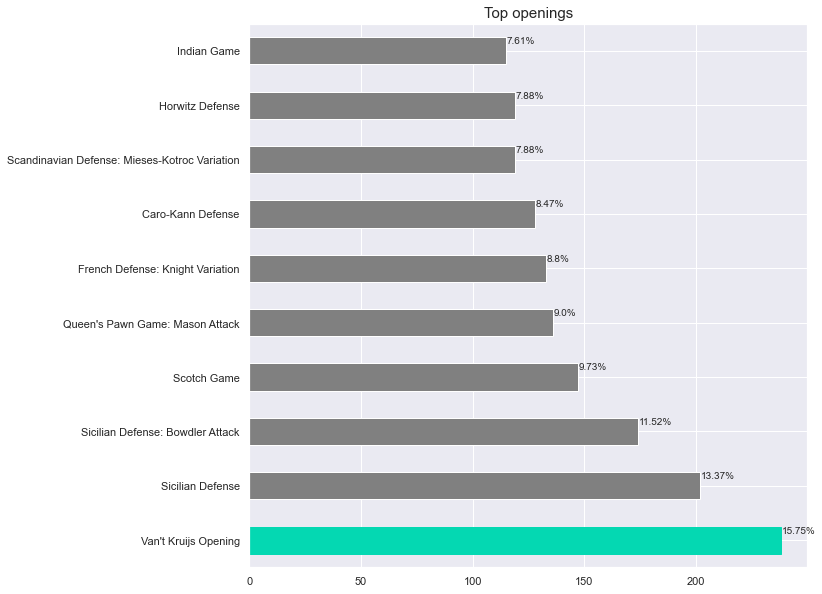

In [206]:
plt.figure(figsize = (10,10))
plt.title("Top openings", size = 15)
ax = df["opening_name"].value_counts()[:10].plot(kind='barh', color = '#808080')
ax.get_children()[0].set_color('#04D8B2') 
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10)

* Van't Kruijs Opening is the first one opening.
* More than 50 %  games are started using top 5 strategies.

In [207]:
ct = pd.crosstab(df.opening_name,df.winner, margins=False)
#ct.sort_values('white', ascending=False)
ct.sort_values('black', ascending=False)

winner,black,draw,white
opening_name,,,
Van't Kruijs Opening,140,12,86
Sicilian Defense,119,8,75
Sicilian Defense: Bowdler Attack,107,8,59
Indian Game,64,8,43
Scandinavian Defense,61,4,46
...,...,...,...
Ruy Lopez: Schliemann Defense,0,0,3
Ruy Lopez: Rotary-Albany Gambit,0,0,1
Ruy Lopez: Open | 6.d4,0,0,1


After "Van't Kruijs Opening" 
   * for whites best 2 strategies are "Scandinavian Defense: Mieses-Kotroc Variation" and "Scotch Game"
   * for blacks best 2 strategies are "Sicilian Defense" and "Sicilian Defense: Bowdler Attack"